In [9]:
# coding:utf-8
import random
import numpy as np

EPOCH = 5000
ALPH   = 0.1
EPSIL  = 0.1
CELL_STATE = [0, 1, 2]
STATE_INDEX = [0, 1, 2, 3, 4, 5 ,6 ,7 ,8]
WIN_PATTERN  = [[0, 1, 2], [0, 3, 6], [1, 4, 7], [2, 5, 8], [3, 4, 5], [6, 7, 8], [0, 4, 8], [2, 4, 6]]
REACH_PATTERN = [[[0, 1], [1, 2], [0, 2]],
                 [[0, 3], [3, 6], [0, 6]],
                 [[1, 4], [1, 7], [4, 7]],
                 [[2, 5], [5, 8], [2, 8]],
                 [[3, 4], [4, 5], [3, 5]],
                 [[6, 7], [7, 8], [6, 8]],
                 [[0, 4], [4, 8], [0, 8]],
                 [[2, 4], [4, 6], [2, 6]]]
RESULT = []

def q_learning():
    qtable = init_qtable()
    for epoch in range(EPOCH):
        now_state = init_state()
        while True:
            now_action = policy_egreedy(now_state, qtable)
            next_state = RL_action(get_state(now_state), now_action)
            state = get_qtablekey(now_state)
            if game_check(next_state, 1) == 2:
                RESULT.append(1)
                qtable[state][now_action] = qtable_update(now_state, now_action, None, qtable, 100., 0)
                break
            elif game_check(next_state, 1) == 1:
                RESULT.append(0)
                qtable[state][now_action] = qtable_update(now_state, now_action, None, qtable, -50., 0)
                break
            next_next_state = CPU_action(next_state)
            if game_check(next_next_state, 2) == 2:
                qtable[state][now_action] = qtable_update(now_state, now_action, None, qtable, -100., 0)
                RESULT.append(0)
                break
            qtable[state][now_action] = qtable_update(now_state, now_action, next_next_state, qtable, -1, 1)
            now_state = next_next_state
    return RESULT

def init_state():
    return [0 for i in range(9)]

def init_qtable():
    qtable = {}
    for a in range(3):
        for b in range(3):
            for c in range(3):
                for d in range(3):
                    for e in range(3):
                        for f in range(3):
                            for g in range(3):
                                for h in range(3):
                                    for i in range(3):
                                        state_vec = [a, b, c, d, e, f, g, h, i]
                                        qtable["".join(map(str, state_vec))] = init_state()
    return qtable

def get_state(state):
    return [st for st in state]

def get_qtablekey(state):
    return "".join(map(str, state))

def RL_action(state, action):
    state[action] = 1
    return state

def CPU_action(state):
    count = 0
    cpu_state = []
    index = state_check(state)
    for st in state:
        if st == 2: cpu_state.append(count)
        count += 1
    for reach in REACH_PATTERN:
        for re in reach:
            if len(set(re)&set(cpu_state)) == 2:
                indexx = list(set(WIN_PATTERN[REACH_PATTERN.index(reach)]) - set(re))[0]
                if indexx in index:
                    state[indexx] = 2
                    return state
    state[random.choice(index)] = 2
    return state
   

def policy_egreedy(now_state, q_table):
    # 現盤面において打つことできるセルのインデックス群を抽出
    canable_index = state_check(now_state)
    state_key = get_qtablekey(now_state)
    # 現盤面における行動価値ベクトルを生成
    _qtable = np.array(q_table[state_key])
    # 現盤面における打つことができるセルに対する行動価値ベクトル生成
    qtable_value = make_dammyvec(canable_index, q_table[state_key])
    q_max = [i for i, x in enumerate(qtable_value) if x == max(qtable_value)]
    q_max = list(set(q_max) & set(canable_index))
    return random.choice(q_max) if EPSIL < random.random() else random.choice(canable_index)

def make_dammyvec(canable_index, _qtable):
    vec = [-1000 for i in range(len(_qtable))]
    for index in canable_index:
        vec[index] = _qtable[index]
    return vec

def qtable_update(now_state, now_action, next_next_state, qtable, reword, terminal):
    # 現盤面でのkeyを生成
    state1_key = get_qtablekey(now_state)
    if terminal:
        state2 = get_qtablekey(next_next_state)
        qtable_value = qtable[state2]
        q = (1. - ALPH) * qtable[state1_key][now_action] + ALPH * (reword + max(qtable_value))
    else:
        q = (1. - ALPH) * qtable[state1_key][now_action] + ALPH * reword
    return q

def game_check(now_state, win_user):
    if draw_check(now_state):
        return 1
    else:
        for pattern in WIN_PATTERN:
            state = np.array(now_state)[pattern]
            count = 0
            for i in list(state):
                if i == win_user:
                    count += 1
            if count == 3:
                return 2
        return 0

def draw_check(now_state):
    for state in now_state:
        if state == 0:
            return False
    return True
    
def state_check(now_state):
    index_list = []
    count = 0
    for state in now_state:
        if state == 0: index_list.append(count)
        count += 1
    return index_list

def main():
    return q_learning()

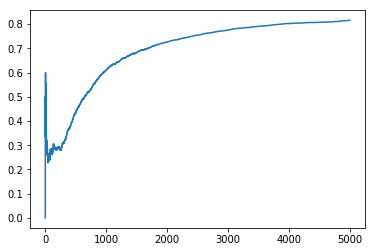

In [10]:
_list = main()
gragh(_list, len(_list))

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def gragh(result, epoch):    
    x = np.arange(0, epoch, 1)
    left = np.array(x)
    count = 0.
    count_1 = 0.
    parcent = []
    for i in result:
        count += 1.
        if i == 1:
            count_1 += 1.
        # if i == 1:
        #     count_1 += 0.5
        parcent.append(float(count_1)/float(count))
        # if count % 500 == 0:
        #     print(float(count_1)/float(count))
    height = np.array(parcent)
    plt.plot(left, height)